# Singapore Clustering and Segmenting

## Import Modules

In [78]:

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# Libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# Tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # Plotting library

# Matplotlib modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Library SKlearn for clustering
from sklearn.cluster import KMeans


# Part 1: Forming Singapore dataset

Test geolocator for Singapore

In [79]:
import geocoder
geolocator = Nominatim(user_agent="My_App")

In [130]:
geolocator =Nominatim(user_agent="My_App")
SGRegions = ["Central Region", "East Region", "North Region", "North-East Region", "West Region"]
SGRegions = [ "The City","Tampines", "Woodlands", "Seletar", "Jurong East"]
lat = []
long = []
neighborhood = []
for place in SGRegions:
    address = place + ", Singapore"
    neighborhood.append(place)
    print(address)
    location = geolocator.geocode(address)
    latitude = location.latitude
    lat.append(latitude)
    longitude = location.longitude
    long.append(longitude)
    print(latitude)
    print(longitude)
print(lat)
print(long)
print(neighborhood)

The City, Singapore
1.357107
103.8194992
Tampines, Singapore
1.3546528
103.9435712
Woodlands, Singapore
1.436897
103.786216
Seletar, Singapore
1.4098488
103.8773789
Jurong East, Singapore
1.333108
103.7422939
[1.357107, 1.3546528, 1.436897, 1.4098488, 1.333108]
[103.8194992, 103.9435712, 103.786216, 103.8773789, 103.7422939]
['The City', 'Tampines', 'Woodlands', 'Seletar', 'Jurong East']


Create a data frame for the Singapore Data

In [131]:
dfSG = pd.DataFrame({'Neighborhood':neighborhood,'Latitude':lat,'Longitude':long})
dfSG

,Neighborhood,Latitude,Longitude
0,The City,1.357107,103.819499
1,Tampines,1.354653,103.943571
2,Woodlands,1.436897,103.786216
3,Seletar,1.409849,103.877379
4,Jurong East,1.333108,103.742294


Find the mean latitide and longtitude for each area

In [132]:
meanLatitude = dfSG['Latitude'].mean(axis = 0)
meanLongitude = dfSG['Longitude'].mean(axis = 0) 

Create map of Singapore using latitude and longitude values

In [134]:
# create map of Singapore using latitude and longitude values
map_SG = folium.Map(location=[meanLatitude, meanLongitude], zoom_start=11)
# add markers to map
for lati, longi, label in zip( dfSG['Latitude'], dfSG['Longitude'],dfSG['Neighborhood']):

    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lati, longi],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SG)  
    
map_SG

### FourSquare

In [135]:
# Initialize parameters to use foursquare
CLIENT_ID = 'MG1CTQ1WQ4E5ZUUJOG3XDU1ZENNEKQXRM5NEBI5XZESQHKTU' # your Foursquare ID
CLIENT_SECRET = 'BGNMCEK4XIDF3TP5IVO0WYII00WFW5NU0H4LR0YGCQPGKE5F' # your Foursquare Secret
ACCESS_TOKEN = 'EB3F4XLEZKK4MV5KGNY1BVGN5KIFM03EZCFN0VF5CTOEKMUE' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
radius=5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,CLIENT_SECRET,VERSION,meanLatitude,meanLongitude,radius,LIMIT)
url

Your credentails:
CLIENT_ID: MG1CTQ1WQ4E5ZUUJOG3XDU1ZENNEKQXRM5NEBI5XZESQHKTU
CLIENT_SECRET:BGNMCEK4XIDF3TP5IVO0WYII00WFW5NU0H4LR0YGCQPGKE5F


'https://api.foursquare.com/v2/venues/explore?&client_id=MG1CTQ1WQ4E5ZUUJOG3XDU1ZENNEKQXRM5NEBI5XZESQHKTU&client_secret=BGNMCEK4XIDF3TP5IVO0WYII00WFW5NU0H4LR0YGCQPGKE5F&v=20180604&ll=1.3783227200000001,103.83379184&radius=5000&limit=500'

In [137]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '608f1a612396435058b8d68a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Singapore',
  'headerFullLocation': 'Singapore',
  'headerLocationGranularity': 'city',
  'totalResults': 196,
  'suggestedBounds': {'ne': {'lat': 1.423322765000045,
    'lng': 103.87872086444543},
   'sw': {'lat': 1.3333226749999552, 'lng': 103.78886281555458}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e26993bd4c007d41a94039a',
       'name': 'Yahava KoffeeWorks',
       'location': {'address': '#B1-02, EBC Lifestyle Hub',
        'crossStreet': '50 Tagore Lane',
        'lat': 1.383541,
        'lng': 103.828091,
        'labeledLatLngs': [{'label': 'display',


In [138]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [100]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\Wen Lin Tan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Yahava KoffeeWorks,Coffee Shop,1.383541,103.828091
1,Lower Peirce Reservoir Park,Park,1.370299,103.826565
2,Prodigal Roasters,Coffee Shop,1.382212,103.841347
3,Bishan - Ang Mo Kio Park,Park,1.362219,103.846250
4,香记粥 (Xiang Ji Porridge),Chinese Restaurant,1.381202,103.840782


In [139]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Part 4: Explore Toronto

A function to repeat the same process to all the neighborhoods in Toronto

In [140]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe of SG_venues with the function above

In [141]:
SG_venues = getNearbyVenues(names=dfSG['Neighborhood'],
                                   latitudes=dfSG['Latitude'],
                                   longitudes=dfSG['Longitude']
                                  )

The City
Tampines
Woodlands
Seletar
Jurong East


In [142]:
SG_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The City,1.357107,103.819499,SICC The Lookout,1.359105,103.818598,Café
1,The City,1.357107,103.819499,SICC Swimming Pool,1.357949,103.818607,Pool
2,The City,1.357107,103.819499,Island Bowl,1.358052,103.818661,Bowling Alley
3,The City,1.357107,103.819499,Silk Restaurant,1.359086,103.818634,Chinese Restaurant
4,The City,1.357107,103.819499,ISP Cafe @ SICC,1.357919,103.818601,Café
...,...,...,...,...,...,...,...
213,Jurong East,1.333108,103.742294,Happy Hawkers 喜多福 (Food Court) (Happy Hawkers),1.334443,103.739576,Food Court
214,Jurong East,1.333108,103.742294,Watsons,1.333174,103.740206,Pharmacy
215,Jurong East,1.333108,103.742294,Fu Chan Food Paradise,1.334489,103.738743,Food Court
216,Jurong East,1.333108,103.742294,Genting Hotel Jurong,1.331528,103.739269,Hotel


In [143]:
# sanity check of the size
print(SG_venues.shape)
SG_venues.head()

(218, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The City,1.357107,103.819499,SICC The Lookout,1.359105,103.818598,Café
1,The City,1.357107,103.819499,SICC Swimming Pool,1.357949,103.818607,Pool
2,The City,1.357107,103.819499,Island Bowl,1.358052,103.818661,Bowling Alley
3,The City,1.357107,103.819499,Silk Restaurant,1.359086,103.818634,Chinese Restaurant
4,The City,1.357107,103.819499,ISP Cafe @ SICC,1.357919,103.818601,Café


In [144]:
# check the number of venes for each neighborhood
SG_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Jurong East,65,65,65,65,65,65
Seletar,4,4,4,4,4,4
Tampines,81,81,81,81,81,81
The City,13,13,13,13,13,13
Woodlands,55,55,55,55,55,55


In [171]:
# check for unique catergories
print('There are {} uniques categories.'.format(len(SG_venues['Venue Category'].unique())))

There are 79 uniques categories.


### Find the Total Number of Restaurants in Toronto Based on Cuisin

In [172]:
# find restaurant and count the types of restaurant
restaurants ={}
for place in SG_venues['Venue Category']:
    if "Restaurant" in place:  
        place = place.replace(' Restaurant','')
        if place in restaurants:
            restaurants[place]=restaurants[place] + 1
        else:
            restaurants[place]= 1
restaurants

{'Chinese': 12,
 'Thai': 3,
 'Dumpling': 2,
 'Japanese': 12,
 'Seafood': 3,
 'Indonesian': 1,
 'Mediterranean': 1,
 'Portuguese': 1,
 'Asian': 6,
 'Sushi': 5,
 'Fast Food': 6,
 'Korean': 3,
 'Indian': 5,
 'American': 2,
 'Restaurant': 1,
 'Shabu-Shabu': 1,
 'Malay': 1,
 'New American': 1,
 'Vegetarian / Vegan': 1,
 'German': 1,
 'Hotpot': 1,
 'Italian': 1,
 'Ramen': 1}

### Create a list of cuisine and another list with the restaurant type occurence

In [166]:
cuisine = [0]*len(restaurants)
counts=[0]*len(restaurants)
findex = 0
for key, value in restaurants.items():
    cuisine[findex] = key
    counts[findex] = value
    findex +=1

print(cuisine)
print(counts)

['Chinese', 'Thai', 'Dumpling', 'Japanese', 'Seafood', 'Indonesian', 'Mediterranean', 'Portuguese', 'Asian', 'Sushi', 'Fast Food', 'Korean', 'Indian', 'American', 'Restaurant', 'Shabu-Shabu', 'Malay', 'New American', 'Vegetarian / Vegan', 'German', 'Hotpot', 'Italian', 'Ramen']
[12, 3, 2, 12, 3, 1, 1, 1, 6, 5, 6, 3, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Create a data frame of cuisine

In [169]:
dfrestTor = pd.DataFrame(data={'cuisine':cuisine,'counts':counts})
dfrestTor
dfrestTor.set_index('cuisine', inplace=True)
dfrestTor.sort_values(['counts'], ascending=False, axis=0, inplace=True)
dfrestTor

,counts
cuisine,
Chinese,12
Japanese,12
Asian,6
Fast Food,6
Indian,5
Sushi,5
Thai,3
Korean,3
Seafood,3


### Plot the number of restaurant types as a histogram

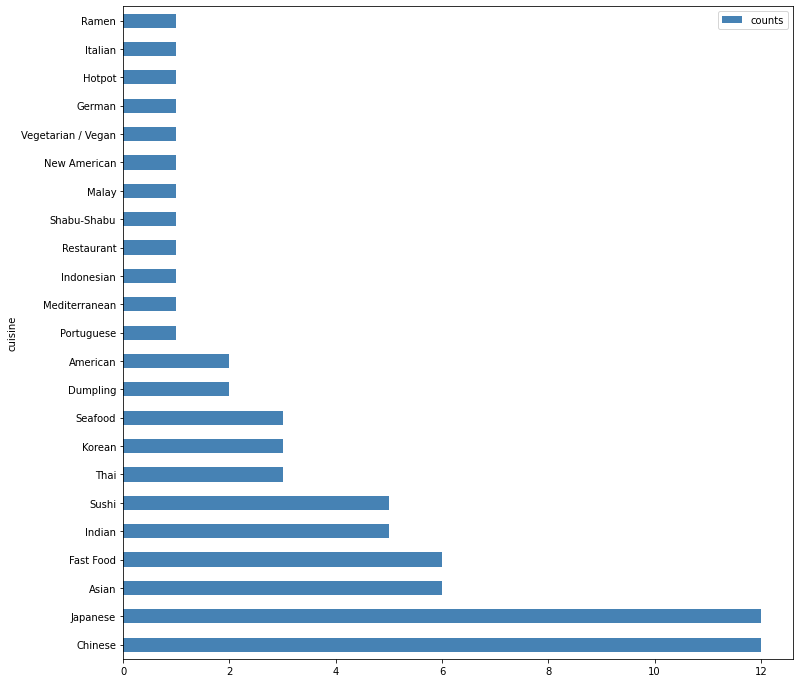

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
dfrestTor.plot(kind='barh', figsize=(12, 12),color='steelblue')

### Analyze Each Neighborhood

#### Use one hot encoding (Convert catergory to numbers)

In [173]:
# one hot encoding
SG_onehot = pd.get_dummies(SG_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SG_onehot['Neighborhood'] = SG_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SG_onehot.columns[-1]] + list(SG_onehot.columns[:-1])
SG_onehot = SG_onehot[fixed_columns]

SG_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Asian Restaurant,Bakery,Bar,Basketball Court,Bookstore,Bowling Alley,...,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Toy / Game Store,Trail,Tunnel,Vegetarian / Vegan Restaurant
0,The City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The City,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,The City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# check size
SG_onehot.shape

(218, 80)

#### Putting number of occurence for each catergory with its corresponging Neighborhood

In [148]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
SG_grouped = SG_onehot.groupby('Neighborhood').mean().reset_index()
SG_grouped

,Neighborhood,Accessories Store,American Restaurant,Arcade,Asian Restaurant,Bakery,Bar,Basketball Court,Bookstore,Bowling Alley,...,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Toy / Game Store,Trail,Tunnel,Vegetarian / Vegan Restaurant
0,Jurong East,0.015385,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.015385,0.000000,...,0.000000,0.015385,0.015385,0.015385,0.015385,0.000000,0.000000,0.015385,0.000000,0.015385
1,Seletar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Tampines,0.000000,0.012346,0.000000,0.037037,0.061728,0.012346,0.000000,0.012346,0.000000,...,0.012346,0.000000,0.012346,0.037037,0.037037,0.024691,0.012346,0.000000,0.012346,0.000000
3,The City,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000
4,Woodlands,0.000000,0.018182,0.018182,0.054545,0.018182,0.000000,0.018182,0.018182,0.018182,...,0.000000,0.000000,0.000000,0.018182,0.018182,0.018182,0.000000,0.000000,0.000000,0.000000


In [149]:
# new size
SG_grouped.shape

(5, 80)

In [150]:
# print the top 5 most common venues for each neighborhood
num_top_venues = 5

for hood in SG_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SG_grouped[SG_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Jurong East----
                 venue  freq
0  Japanese Restaurant  0.09
1   Chinese Restaurant  0.09
2                 Café  0.06
3          Coffee Shop  0.06
4           Food Court  0.05


----Seletar----
             venue  freq
0             Café  0.25
1  Harbor / Marina  0.25
2      Snack Place  0.25
3       Food Court  0.25
4    Movie Theater  0.00


----Tampines----
           venue  freq
0         Bakery  0.06
1     Food Court  0.05
2           Café  0.05
3    Coffee Shop  0.05
4  Shopping Mall  0.04


----The City----
                venue  freq
0               Trail  0.15
1         Golf Course  0.15
2                Café  0.15
3  Chinese Restaurant  0.08
4                 Gym  0.08


----Woodlands----
                 venue  freq
0          Coffee Shop  0.07
1  Japanese Restaurant  0.07
2     Asian Restaurant  0.05
3                 Café  0.05
4   Chinese Restaurant  0.04




In [ ]:
# a function to transfer data to panda dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### create the dataframe above and display the top 10 venues for each neighborhood

In [174]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SG_grouped['Neighborhood']

for ind in np.arange(SG_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SG_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jurong East,Japanese Restaurant,Chinese Restaurant,Coffee Shop,Café,Food Court,Shopping Mall,Bubble Tea Shop,Clothing Store,Korean Restaurant,Multiplex
1,Seletar,Snack Place,Food Court,Harbor / Marina,Café,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,German Restaurant,Gift Shop
2,Tampines,Bakery,Café,Food Court,Coffee Shop,Shopping Mall,Sushi Restaurant,Supermarket,Gym,Chinese Restaurant,Fast Food Restaurant
3,The City,Golf Course,Trail,Café,Gym,Diner,Rest Area,Chinese Restaurant,Bowling Alley,Pool,Sporting Goods Shop
4,Woodlands,Japanese Restaurant,Coffee Shop,Asian Restaurant,Café,Clothing Store,Indian Restaurant,Frozen Yogurt Shop,Chinese Restaurant,Fast Food Restaurant,Electronics Store


### Cluster Neighborhoods

In [155]:
# Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 3

SG_grouped_clustering = SG_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SG_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [156]:

SG_merged = dfSG
# Use this code only once
SG_merged = SG_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
SG_merged.head()


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The City,1.357107,103.819499,2,Golf Course,Trail,Café,Gym,Diner,Rest Area,Chinese Restaurant,Bowling Alley,Pool,Sporting Goods Shop
1,Tampines,1.354653,103.943571,0,Bakery,Café,Food Court,Coffee Shop,Shopping Mall,Sushi Restaurant,Supermarket,Gym,Chinese Restaurant,Fast Food Restaurant
2,Woodlands,1.436897,103.786216,0,Japanese Restaurant,Coffee Shop,Asian Restaurant,Café,Clothing Store,Indian Restaurant,Frozen Yogurt Shop,Chinese Restaurant,Fast Food Restaurant,Electronics Store
3,Seletar,1.409849,103.877379,1,Snack Place,Food Court,Harbor / Marina,Café,Vegetarian / Vegan Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,German Restaurant,Gift Shop
4,Jurong East,1.333108,103.742294,0,Japanese Restaurant,Chinese Restaurant,Coffee Shop,Café,Food Court,Shopping Mall,Bubble Tea Shop,Clothing Store,Korean Restaurant,Multiplex


In [158]:
# create map
map_clusters = folium.Map(location=[meanLatitude, meanLongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SG_merged['Latitude'], SG_merged['Longitude'], SG_merged['Neighborhood'], SG_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Part 5: Examine Cluster

### Define function for data analysis purposes

In [65]:
# define a function to find restaurants from the top 10th most common of the area
def countRestCluster (dfcluster):
    commanVStr = "Most Common Venue"
    restCluster = {}
    for index, row in dfcluster.iterrows():
        for i in range(1,11):
            s = ""
            if i == 1:
                s = s+"1st " + commanVStr
            elif i == 2:
                s = s+"2nd " + commanVStr
            elif i == 3:
                s = s+"3rd " + commanVStr
            else:
                s = str(i)+ "th " + commanVStr

            if "Restaurant" in  row[s]:
                key = row[s]
                key = key.replace(' Restaurant','')
                if key in restCluster.keys():
                    restCluster[key]=restCluster[key] + 1
                else:
                    restCluster[key]= 1    
    return restCluster

# count 
def clustDF(restClus):
    cuisineHere = [0]*len(restClus)
    countsHere=[0]*len(restClus)
    findex = 0
    for key, value in restClus.items():
        cuisineHere[findex] = key
        countsHere[findex] = value
        findex +=1
    dfrestClus = pd.DataFrame(data={'cuisine':cuisineHere,'counts':countsHere})
    dfrestClus.set_index('cuisine', inplace=True)
    return dfrestClus
    

### Cluster 0

In [175]:
# find this cluster
cluster0 =pd.DataFrame(SG_merged.loc[SG_merged['Cluster Labels'] == 0, SG_merged.columns[[1] + list(range(5, SG_merged.shape[1]))]])
cluster0

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1.354653,Café,Food Court,Coffee Shop,Shopping Mall,Sushi Restaurant,Supermarket,Gym,Chinese Restaurant,Fast Food Restaurant
2,1.436897,Coffee Shop,Asian Restaurant,Café,Clothing Store,Indian Restaurant,Frozen Yogurt Shop,Chinese Restaurant,Fast Food Restaurant,Electronics Store
4,1.333108,Chinese Restaurant,Coffee Shop,Café,Food Court,Shopping Mall,Bubble Tea Shop,Clothing Store,Korean Restaurant,Multiplex


In [176]:
# Count the restaurant in this cluster from the top 10 most common venues
restCluster0=countRestCluster(cluster0)
restCluster0

{'Sushi': 1,
 'Chinese': 3,
 'Fast Food': 2,
 'Asian': 1,
 'Indian': 1,
 'Korean': 1}

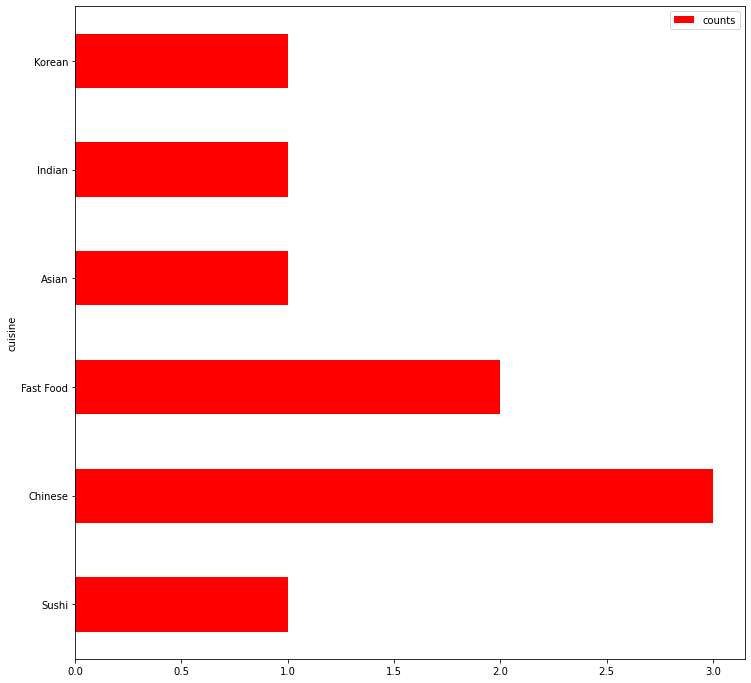

In [177]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus0 = clustDF(restCluster0)

# Create a histogram to illustrate the data
pandaClus0.plot(kind='barh', figsize=(12, 12),color='Red') 

### Cluster 1

In [67]:
# find this cluster
cluster1 = pd.DataFrame(SG_merged.loc[SG_merged['Cluster Labels'] == 1, SG_merged.columns[[1] + list(range(5, SG_merged.shape[1]))]])
cluster1

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,1.409849,Café,Food Court,Snack Place,Women's Store,Fried Chicken Joint,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Food & Drink Shop


In [178]:
 # Count the restaurant in this cluster from the top 10 most common venues
restCluster1=countRestCluster(cluster1)
restCluster1

{'Dumpling': 1, 'Fast Food': 1}

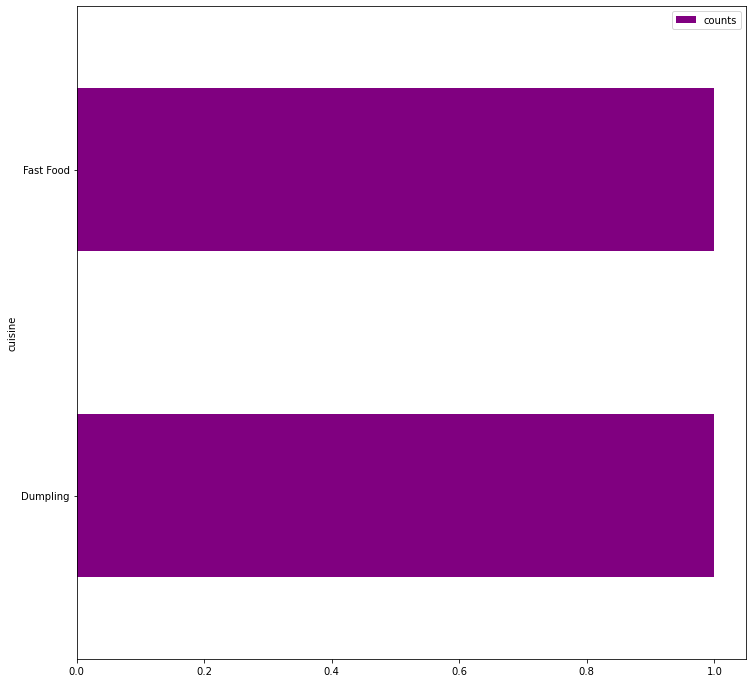

In [179]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus1 = clustDF(restCluster1)

# Create a histogram to illustrate the data
pandaClus1.plot(kind='barh', figsize=(12, 12),color='Purple') 

### Cluster 2

In [181]:
# find this cluster
cluster2 = pd.DataFrame(SG_merged.loc[SG_merged['Cluster Labels'] == 2, SG_merged.columns[[1] + list(range(5, SG_merged.shape[1]))]])
cluster2

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.357107,Trail,Café,Gym,Diner,Rest Area,Chinese Restaurant,Bowling Alley,Pool,Sporting Goods Shop


In [182]:
 # Count the restaurant in this cluster from the top 10 most common venues
restCluster2=countRestCluster(cluster2)
restCluster2

{'Chinese': 1}

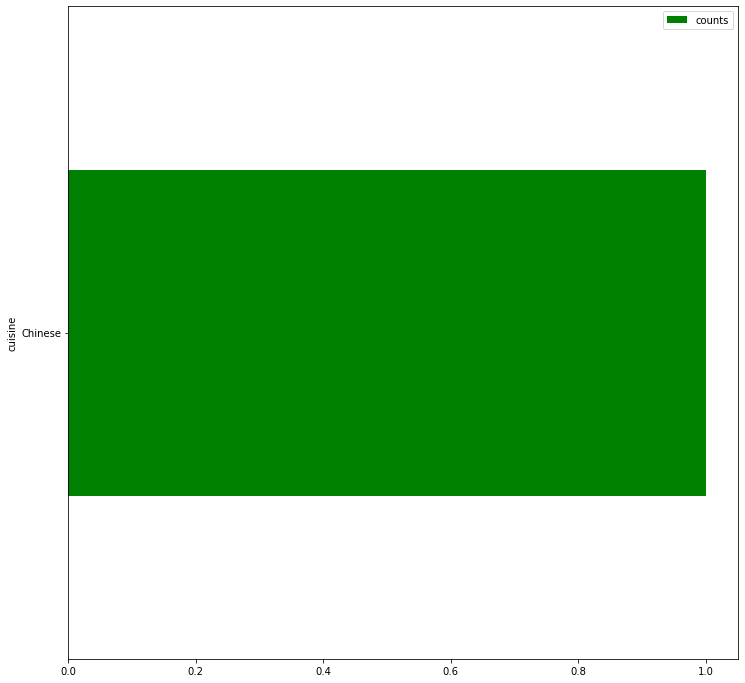

In [183]:
# Create a data frame of cuisine restaurant  from the top 10 most common venues
pandaClus2 = clustDF(restCluster2)

# Create a histogram to illustrate the data
pandaClus2.plot(kind='barh', figsize=(12, 12),color='Green') 